Aminah Nurrahmawati
20220021

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('credit_card.csv')
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
X = df.iloc[:, [3, 4]].values
print(X)

[[  95.4     0.  ]
 [   0.      0.  ]
 [ 773.17  773.17]
 ...
 [ 144.4     0.  ]
 [   0.      0.  ]
 [1093.25 1093.25]]


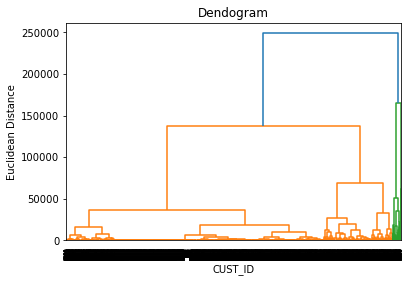

In [9]:
# Using Dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward')) # The ward method tries to minimise the variance in each cluster
plt.title('Dendogram')
plt.xlabel('CUST_ID')
plt.ylabel('Euclidean Distance')
plt.show()

In [10]:
# Fitting hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
y_hc

array([1, 1, 1, ..., 1, 1, 4], dtype=int64)

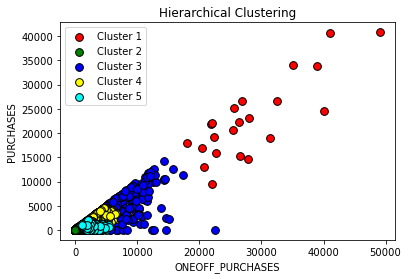

In [12]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], color='red', s=60, label='Cluster 1', edgecolors='black')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], color='green', s=60, label='Cluster 2', edgecolors='black')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], color='blue',s=60, label='Cluster 3', edgecolors='black')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], color='yellow', s=60, label='Cluster 4', edgecolors='black')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], color='cyan', s=60, label='Cluster 5', edgecolors='black')
# cluster centres
# plt.scatter(hc.cluster_centers_[:, 0], hc.cluster_centers_[:, 1], color='magenta', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Hierarchical Clustering')
plt.ylabel('PURCHASES')
plt.xlabel('ONEOFF_PURCHASES')
plt.show()